In [ ]:
!pip install arabic_reshaper


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


In [ ]:
label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}
classes = ['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load prediction dataframes
csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_embeddings.csv",
    "/content/transformer_examples.csv",
    "/content/gru (1).csv"
]

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Assuming all dataframes have the same "True Label" and "Predicted Label" columns
true_labels = pd.read_csv(csv_paths[0])["True Label"]
predicted_labels_list = [pd.read_csv(csv_path)["Predicted Label"] for csv_path in csv_paths]

# Calculate metrics per model
for idx, predicted_labels in enumerate(predicted_labels_list):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='macro')
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels, average='macro')

    print(f"Metrics for {model_names[idx]}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("=" * 20)



Metrics for Logistic Regression:
Accuracy: 0.7166
Precision: 0.7206
Recall: 0.7081
F1-Score: 0.7079
Metrics for Naive Bayes:
Accuracy: 0.4960
Precision: 0.4931
Recall: 0.4829
F1-Score: 0.4738
Metrics for Transformer:
Accuracy: 0.7232
Precision: 0.7288
Recall: 0.7233
F1-Score: 0.7172
Metrics for GRU:
Accuracy: 0.7556
Precision: 0.7617
Recall: 0.7565
F1-Score: 0.7564


In [ ]:

def make_confusion_matrix(df):
    actual_labels = df["True Label"]
    predicted_labels = df["Predicted Label"]


    unique_labels = np.unique(np.concatenate((actual_labels, predicted_labels)))
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

    actual_labels_mapped = np.array([label_mapping[label] for label in actual_labels])
    predicted_labels_mapped = np.array([label_mapping[label] for label in predicted_labels])

    cm = confusion_matrix(actual_labels_mapped, predicted_labels_mapped, labels=list(range(len(unique_labels))))
    return cm

def print_cmatrix(cm)  :
    # Create a heatmap of the confusion matrix using seaborn
    plt.figure(figsize=(7, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


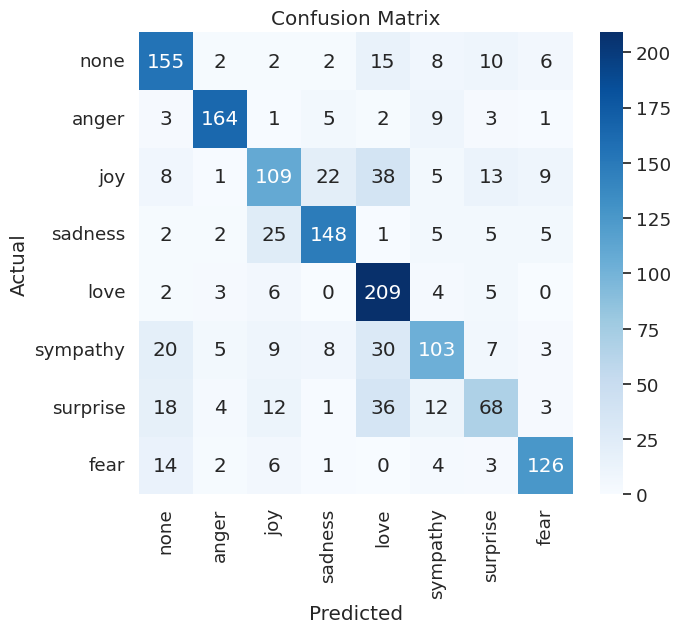

In [ ]:
csv_file_path = "/content/logestic_regression_predections.csv"  # Replace with your file path
logestic_reg_df = pd.read_csv(csv_file_path)

# Call the function to print confusion matrix for the DataFrame
logestic_reg_cm=make_confusion_matrix(logestic_reg_df)
print_cmatrix(logestic_reg_cm)

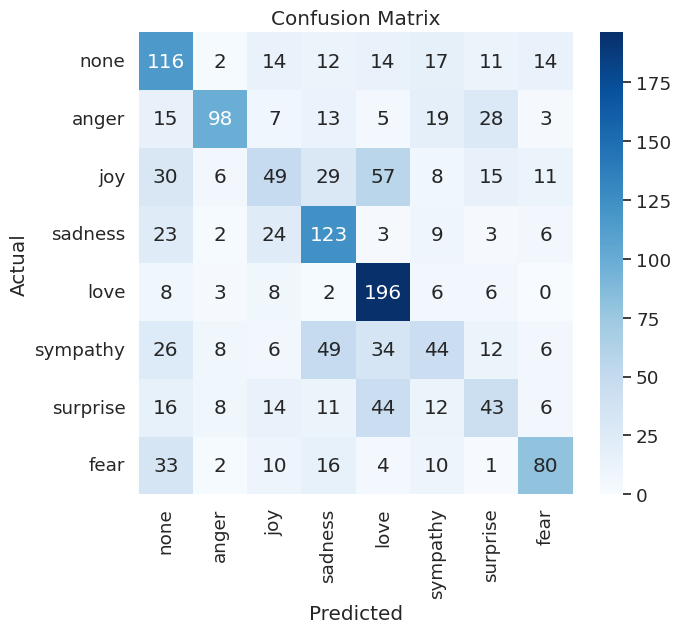

In [ ]:
csv_file_path = "/content/nb_examples_embeddings.csv"  # Replace with your file path
nb_df = pd.read_csv(csv_file_path)

# Call the function to print confusion matrix for the DataFrame
nb_cm=make_confusion_matrix(nb_df)
print_cmatrix(nb_cm)

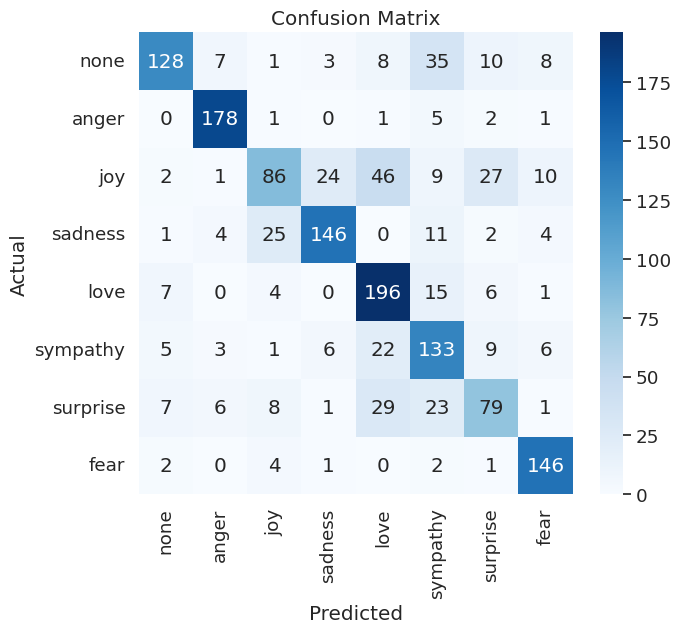

In [ ]:
csv_file_path = "/content/transformer_examples.csv"  # Replace with your file path
transformer_df = pd.read_csv(csv_file_path)

# Call the function to print confusion matrix for the DataFrame
transformer_cm=make_confusion_matrix(transformer_df)
print_cmatrix(transformer_cm)

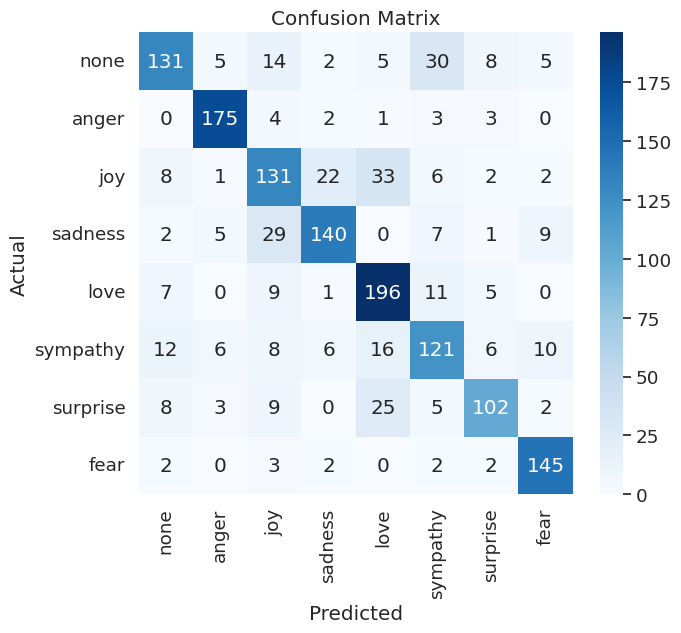

In [ ]:
csv_file_path = "/content/gru (1).csv"  # Replace with your file path
gru_df = pd.read_csv(csv_file_path)

# Call the function to print confusion matrix for the DataFrame
gru_cm=make_confusion_matrix(gru_df)
print_cmatrix(gru_cm)

Comparison between Logistic Regression and Naive Bayes:
Matching predictions: 874
Differing predictions: 636

Comparison between Logistic Regression and Transformer:
Matching predictions: 1167
Differing predictions: 343

Comparison between Logistic Regression and GRU:
Matching predictions: 1144
Differing predictions: 366

Comparison between Naive Bayes and Transformer:
Matching predictions: 823
Differing predictions: 687

Comparison between Naive Bayes and GRU:
Matching predictions: 766
Differing predictions: 744

Comparison between Transformer and GRU:
Matching predictions: 1130
Differing predictions: 380



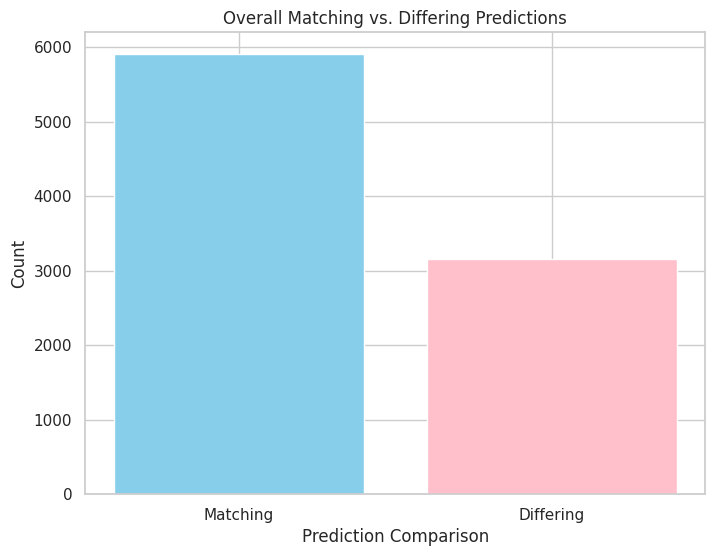

In [ ]:
import pandas as pd

# File paths and model names
csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_embeddings.csv",
    "/content/transformer_examples.csv",
    "/content/gru (1).csv"
]

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Load prediction data into DataFrames
dataframes = [pd.read_csv(path) for path in csv_paths]

# Initialize counters
num_models = len(dataframes)
num_samples = len(dataframes[0])  # Assuming all models have the same number of samples

matching_counts = [[0] * num_models for _ in range(num_models)]
differing_counts = [[0] * num_models for _ in range(num_models)]

# Compare predictions
for i in range(num_models):
    for j in range(i + 1, num_models):
        for sample_idx in range(num_samples):
            pred_i = dataframes[i]["Predicted Label"][sample_idx]
            pred_j = dataframes[j]["Predicted Label"][sample_idx]

            if pred_i == pred_j:
                matching_counts[i][j] += 1
                matching_counts[j][i] += 1
            else:
                differing_counts[i][j] += 1
                differing_counts[j][i] += 1

# Print comparison results
for i in range(num_models):
    for j in range(i + 1, num_models):
        print(f"Comparison between {model_names[i]} and {model_names[j]}:")
        print(f"Matching predictions: {matching_counts[i][j]}")
        print(f"Differing predictions: {differing_counts[i][j]}\n")

total_matching = sum(sum(row) for row in matching_counts) // 2  # Divide by 2 to avoid double counting
total_differing = sum(sum(row) for row in differing_counts) // 2

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Matching', 'Differing'], [total_matching, total_differing], color=['skyblue', 'pink'])
plt.xlabel('Prediction Comparison')
plt.ylabel('Count')
plt.title('Overall Matching vs. Differing Predictions')
plt.show()



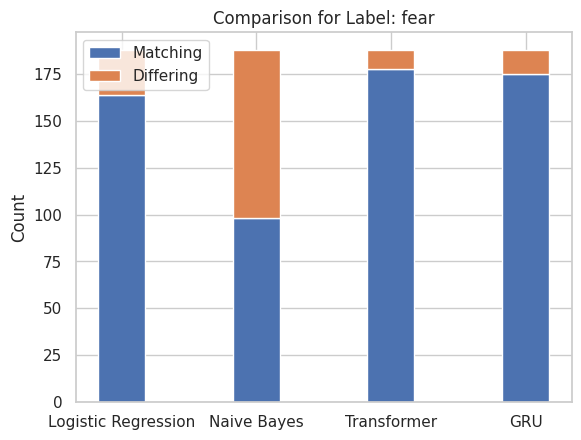

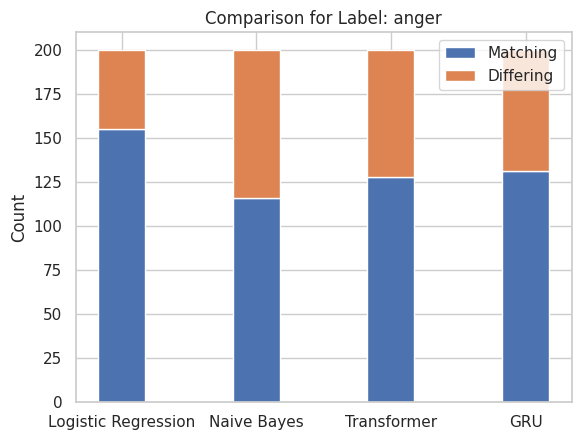

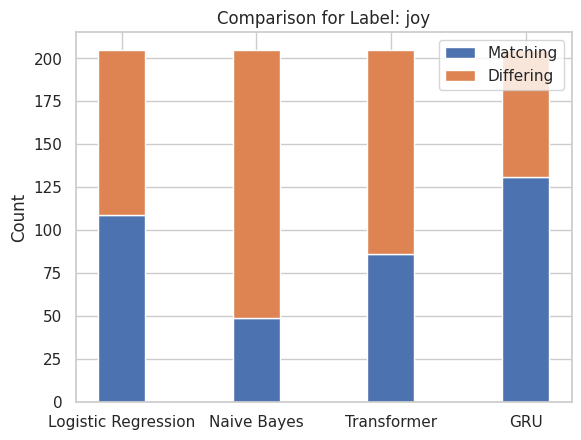

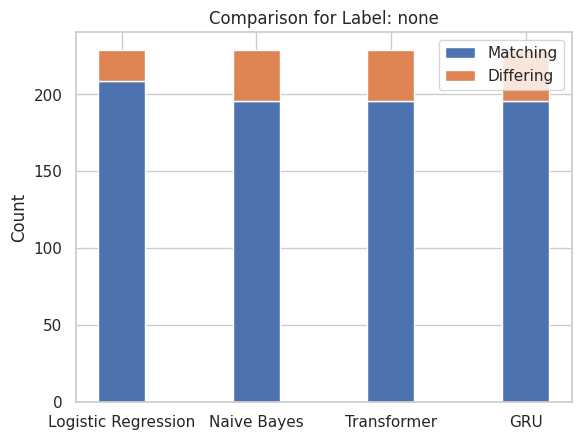

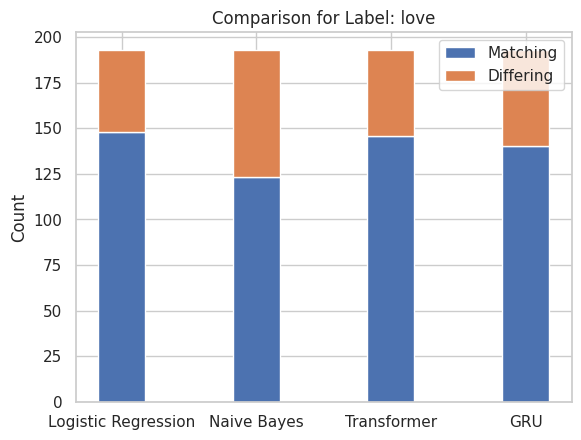

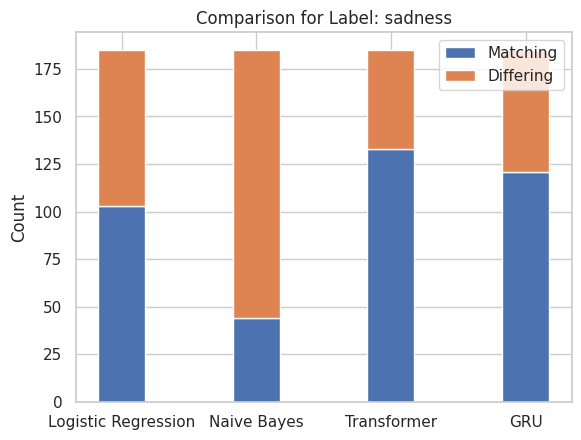

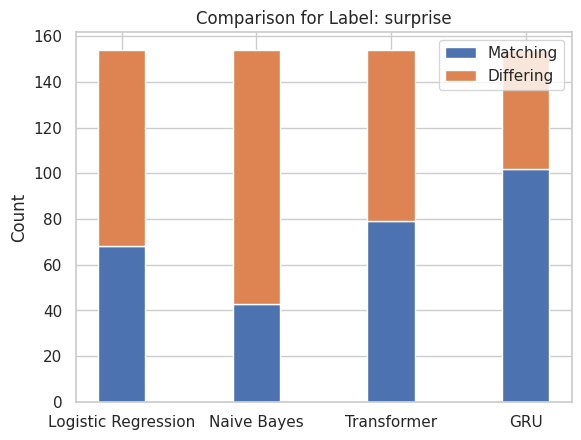

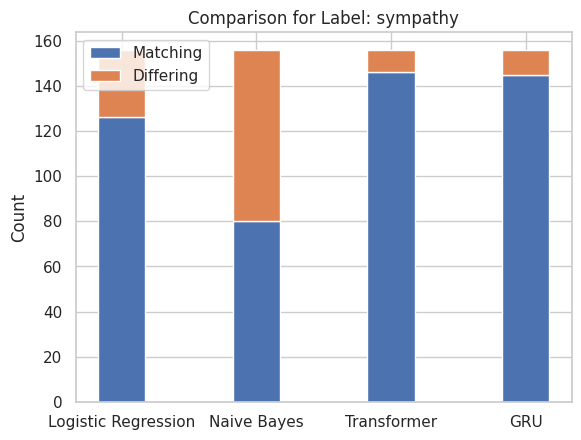

In [ ]:

# Load prediction data from CSV files into DataFrames
dfs = [pd.read_csv(path) for path in csv_paths]

# Get unique labels
all_labels = dfs[0]["True Label"].unique()

# Initialize dictionaries to store matching and differing counts per label
matching_counts_per_label = {label: {model: 0 for model in model_names} for label in all_labels}
differing_counts_per_label = {label: {model: 0 for model in model_names} for label in all_labels}

# Compare model predictions per label
for model_idx, df in enumerate(dfs):
    model_name = model_names[model_idx]
    for label in all_labels:
        label_df = df[df["True Label"] == label]
        model_preds = label_df["Predicted Label"]
        matching_count = sum(model_preds == label_df["True Label"])
        differing_count = len(model_preds) - matching_count

        matching_counts_per_label[label][model_name] = matching_count
        differing_counts_per_label[label][model_name] = differing_count

# Plot the comparison results
for label in all_labels:
    matching_counts = [matching_counts_per_label[label][model] for model in model_names]
    differing_counts = [differing_counts_per_label[label][model] for model in model_names]

    x = range(len(model_names))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x, matching_counts, width, label='Matching')
    ax.bar(x, differing_counts, width, bottom=matching_counts, label='Differing')

    ax.set_ylabel('Count')
    ax.set_title(f'Comparison for Label: {label}')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.legend()

    plt.show()

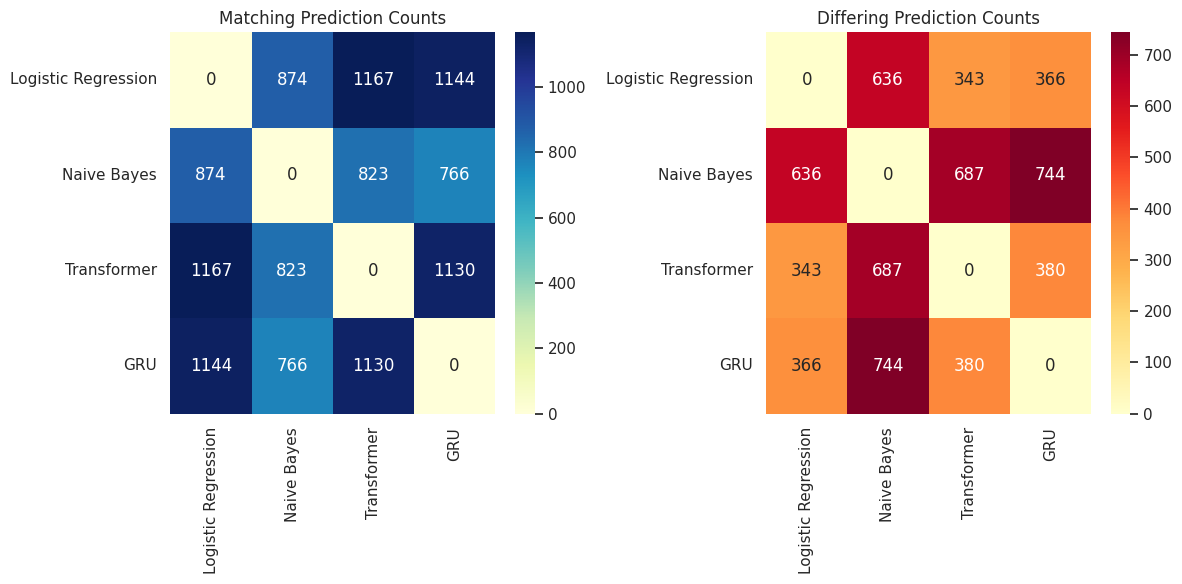

In [ ]:

# Create a matrix for matching and differing counts
matching_matrix = [[matching_counts[i][j] for j in range(num_models)] for i in range(num_models)]
differing_matrix = [[differing_counts[i][j] for j in range(num_models)] for i in range(num_models)]

# Convert the matrices to DataFrames for easier plotting
matching_df = pd.DataFrame(matching_matrix, columns=model_names, index=model_names)
differing_df = pd.DataFrame(differing_matrix, columns=model_names, index=model_names)

# Set up the figure and plot
plt.figure(figsize=(12, 6))

# Plot the heatmap for matching counts
plt.subplot(1, 2, 1)
sns.heatmap(matching_df, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Matching Prediction Counts")

# Plot the heatmap for differing counts
plt.subplot(1, 2, 2)
sns.heatmap(differing_df, annot=True, fmt="d", cmap="YlOrRd", cbar=True)
plt.title("Differing Prediction Counts")

plt.tight_layout()
plt.show()

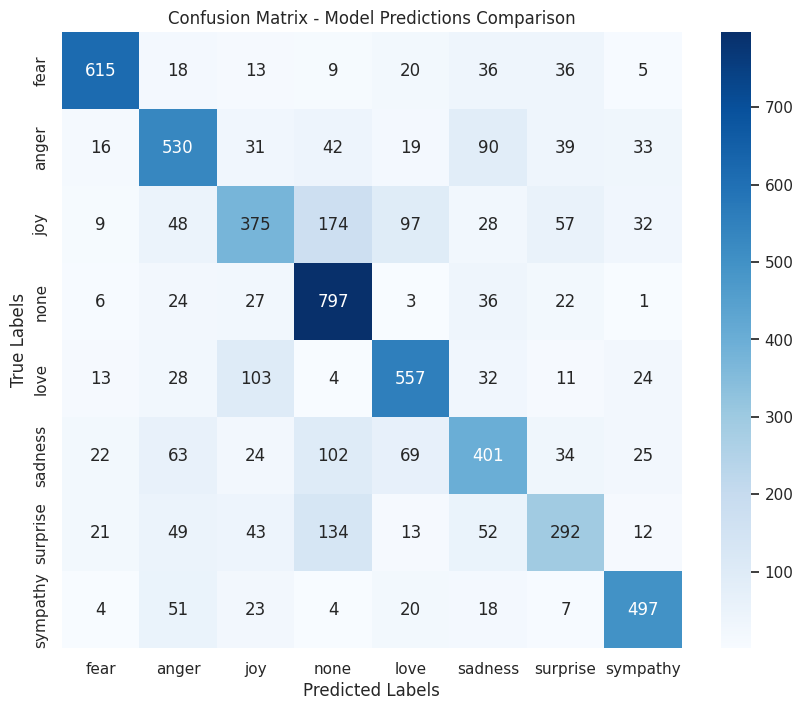

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... (same code as before to load dataframes and initialize counters) ...

# Create an empty dictionary to store confusion matrices for each label
label_confusion_matrices = {model: None for model in model_names}

# Compute confusion matrices for each model
for i, model_name in enumerate(model_names):
    true_labels = dataframes[i]["True Label"]
    predicted_labels = dataframes[i]["Predicted Label"]
    cm = confusion_matrix(true_labels, predicted_labels, labels=true_labels.unique())
    label_confusion_matrices[model_name] = cm

# Combine confusion matrices for all models
all_labels = true_labels.unique()
combined_confusion_matrix = sum(label_confusion_matrices.values())

# Create a DataFrame for the combined confusion matrix
confusion_df = pd.DataFrame(combined_confusion_matrix, index=all_labels, columns=all_labels)

# Set up the figure and plot
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix - Model Predictions Comparison")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


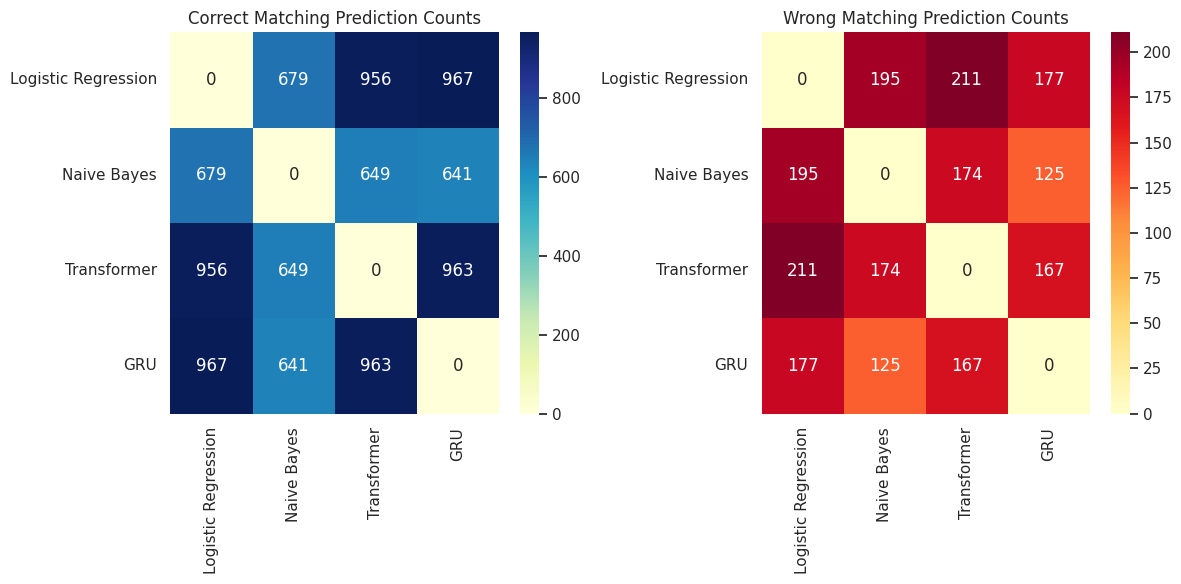

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (same code as before to load dataframes and initialize counters) ...

# Initialize counters for correct and wrong predictions
correct_matching_counts = [[0] * num_models for _ in range(num_models)]
wrong_matching_counts = [[0] * num_models for _ in range(num_models)]

# Compare predictions to true labels
for i in range(num_models):
    for j in range(i + 1, num_models):
        for sample_idx in range(num_samples):
            pred_i = dataframes[i]["Predicted Label"][sample_idx]
            pred_j = dataframes[j]["Predicted Label"][sample_idx]
            true_label = dataframes[i]["True Label"][sample_idx]

            if pred_i == pred_j and pred_i == true_label:
                correct_matching_counts[i][j] += 1
                correct_matching_counts[j][i] += 1
            elif pred_i == pred_j and pred_i != true_label:
                wrong_matching_counts[i][j] += 1
                wrong_matching_counts[j][i] += 1

# Create matrices for correct and wrong matching counts
correct_matching_matrix = [[correct_matching_counts[i][j] for j in range(num_models)] for i in range(num_models)]
wrong_matching_matrix = [[wrong_matching_counts[i][j] for j in range(num_models)] for i in range(num_models)]

# Convert the matrices to DataFrames for plotting
correct_matching_df = pd.DataFrame(correct_matching_matrix, columns=model_names, index=model_names)
wrong_matching_df = pd.DataFrame(wrong_matching_matrix, columns=model_names, index=model_names)

# Set up the figure and plots
plt.figure(figsize=(12, 6))

# Plot the heatmap for correct matching counts
plt.subplot(1, 2, 1)
sns.heatmap(correct_matching_df, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Correct Matching Prediction Counts")

# Plot the heatmap for wrong matching counts
plt.subplot(1, 2, 2)
sns.heatmap(wrong_matching_df, annot=True, fmt="d", cmap="YlOrRd", cbar=True)
plt.title("Wrong Matching Prediction Counts")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_embeddings.csv",
    "/content/transformer_examples.csv",
    "/content/gru (1).csv"
]

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Load the CSV files into DataFrames
data_frames = [pd.read_csv(path) for path in csv_paths]

# Create a DataFrame to store the merged predictions
merged_df = pd.DataFrame()

# Add the true labels
merged_df["True Label"] = data_frames[0]["True Label"]  # Assuming all true labels are the same

# Add predicted labels from each model
for i, model_name in enumerate(model_names):
    merged_df[model_name] = data_frames[i]["Predicted Label"]

# Add a column to indicate if predictions match each other
for i in range(1, len(model_names)):
    col_name = f"Match {model_names[i]}"
    merged_df[col_name] = (merged_df[model_names[i]] == merged_df[model_names[0]]).astype(int)

# Add a column to indicate if all predictions match for each sample
merged_df["All Match"] = (merged_df.iloc[:, 2:] == 1).all(axis=1).astype(int)

# Display the merged DataFrame
print(merged_df.head())



  True Label Logistic Regression Naive Bayes Transformer    GRU  \
0       fear                none        none    surprise   none   
1      anger               anger       anger       anger  anger   
2        joy                none        none        none   none   
3       none                none        none        none   none   
4       fear                fear     sadness        fear   fear   

   Match Naive Bayes  Match Transformer  Match GRU  All Match  
0                  1                  0          1          0  
1                  1                  1          1          0  
2                  1                  1          1          0  
3                  1                  1          1          0  
4                  0                  1          1          0  


Label: fear
Matching Labels: 94, Differing Labels: 94
--------------------
Label: anger
Matching Labels: 73, Differing Labels: 127
--------------------
Label: joy
Matching Labels: 55, Differing Labels: 150
--------------------
Label: none
Matching Labels: 150, Differing Labels: 79
--------------------
Label: love
Matching Labels: 106, Differing Labels: 87
--------------------
Label: sadness
Matching Labels: 50, Differing Labels: 135
--------------------
Label: surprise
Matching Labels: 47, Differing Labels: 107
--------------------
Label: sympathy
Matching Labels: 73, Differing Labels: 83
--------------------


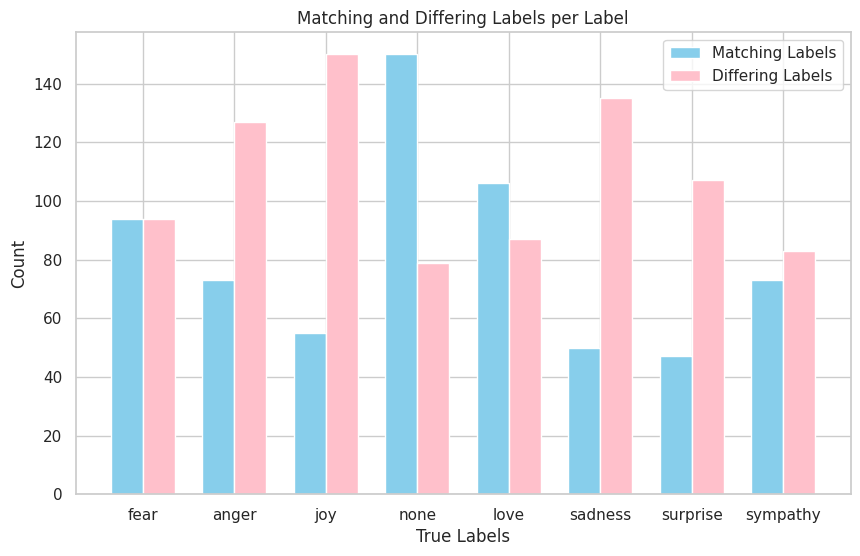

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load prediction dataframes
csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_embeddings.csv",
    "/content/transformer_examples.csv",
    "/content/gru (1).csv"
]

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

prediction_dfs = [pd.read_csv(csv_path) for csv_path in csv_paths]

# Assuming all dataframes have the same "True Label" and "Predicted Label" columns
true_labels = prediction_dfs[0]["True Label"]
predicted_labels_list = [df["Predicted Label"] for df in prediction_dfs]

# Find matching and differing predictions
matching_labels = []
differing_labels = []

for idx, true_label in enumerate(true_labels):
    predicted_labels = [pl[idx] for pl in predicted_labels_list]
    if all(label == predicted_labels[0] for label in predicted_labels):
        matching_labels.append((true_label, predicted_labels[0]))
    else:
        differing_labels.append((true_label, predicted_labels))

# Count matching and differing labels per label
match_counts = {label: 0 for label in true_labels.unique()}
diff_counts = {label: 0 for label in true_labels.unique()}

for true_label, _ in matching_labels:
    match_counts[true_label] += 1

for true_label, _ in differing_labels:
    diff_counts[true_label] += 1

# Print numbers of matching and differing labels per label
for label in true_labels.unique():
    print(f"Label: {label}")
    print(f"Matching Labels: {match_counts[label]}, Differing Labels: {diff_counts[label]}")
    print("-" * 20)

# Plotting side by side bars
width = 0.35
x = np.arange(len(true_labels.unique()))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, list(match_counts.values()), width, label='Matching Labels', color='skyblue')
ax.bar(x + width/2, list(diff_counts.values()), width, label='Differing Labels', color='pink')

ax.set_xlabel('True Labels')
ax.set_ylabel('Count')
ax.set_title('Matching and Differing Labels per Label')
ax.set_xticks(x)
ax.set_xticklabels(list(true_labels.unique()))
ax.legend()

plt.show()


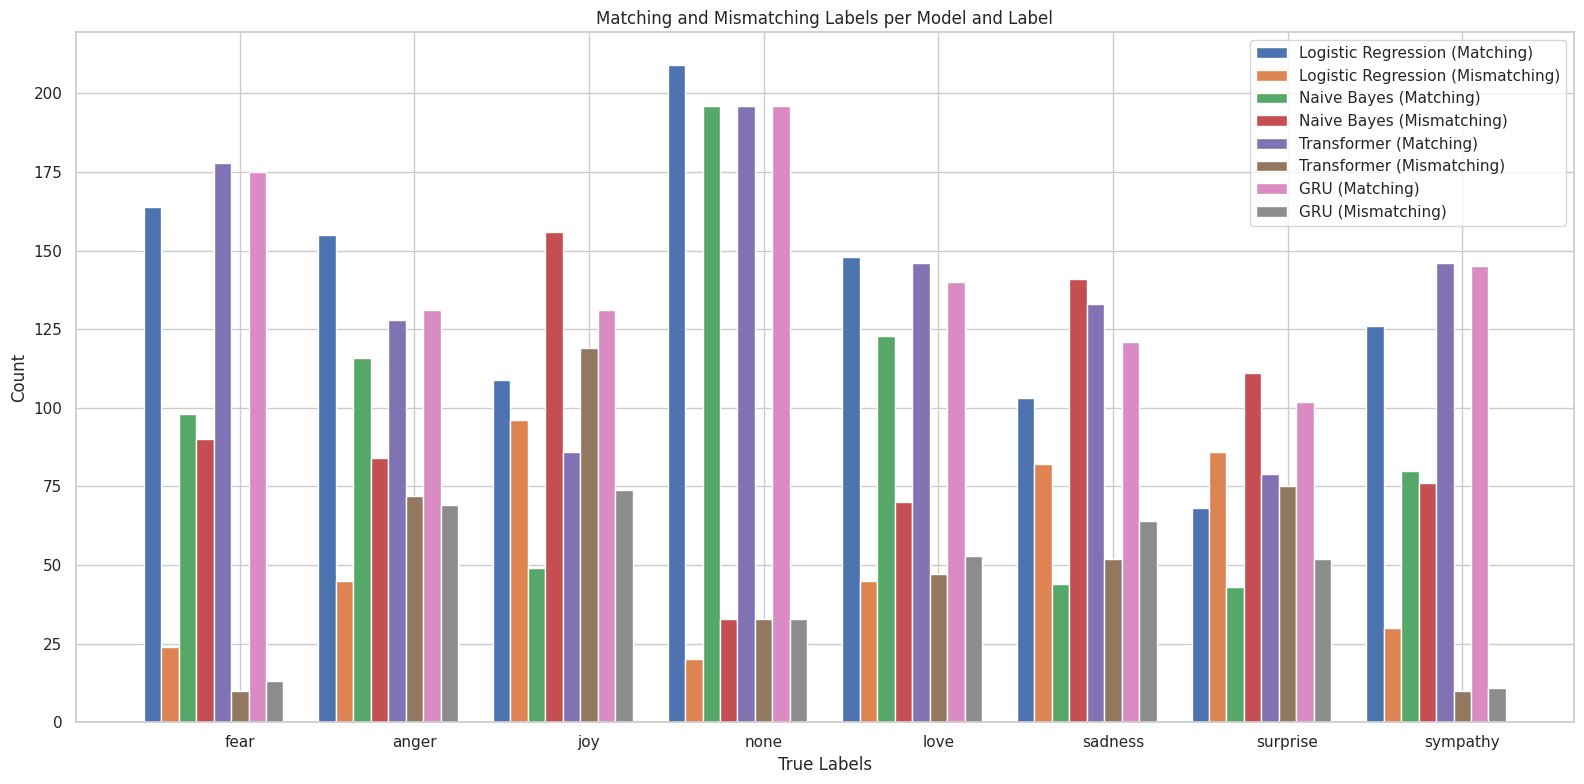

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load prediction dataframes
csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_embeddings.csv",
    "/content/transformer_examples.csv",
    "/content/gru (1).csv"
]

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Assuming all dataframes have the same "True Label" and "Predicted Label" columns
true_labels = pd.read_csv(csv_paths[0])["True Label"]
predicted_labels_list = [pd.read_csv(csv_path)["Predicted Label"] for csv_path in csv_paths]

matching_counts = []
mismatching_counts = []

# Calculate matching and mismatching counts per label and model
for predicted_labels in predicted_labels_list:
    matching_per_label = {}
    mismatching_per_label = {}

    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if true_label == predicted_label:
            matching_per_label[true_label] = matching_per_label.get(true_label, 0) + 1
        else:
            mismatching_per_label[true_label] = mismatching_per_label.get(true_label, 0) + 1

    matching_counts.append([matching_per_label.get(label, 0) for label in true_labels.unique()])
    mismatching_counts.append([mismatching_per_label.get(label, 0) for label in true_labels.unique()])

# Plotting grouped bars
x = np.arange(len(true_labels.unique()))
total_width = 0.8  # Total width for all bars
bar_width = total_width / len(model_names) / 2  # Width per model (super thin)

fig, ax = plt.subplots(figsize=(16, 8))

for idx, model_name in enumerate(model_names):
    model_offset = (idx - len(model_names) / 2) * bar_width * 2
    ax.bar(x + model_offset, matching_counts[idx], bar_width, label=f"{model_name} (Matching)")
    ax.bar(x + model_offset + bar_width, mismatching_counts[idx], bar_width, label=f"{model_name} (Mismatching)")

ax.set_xlabel('True Labels')
ax.set_ylabel('Count')
ax.set_title('Matching and Mismatching Labels per Model and Label')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(list(true_labels.unique()))
ax.legend()

plt.tight_layout()
plt.show()


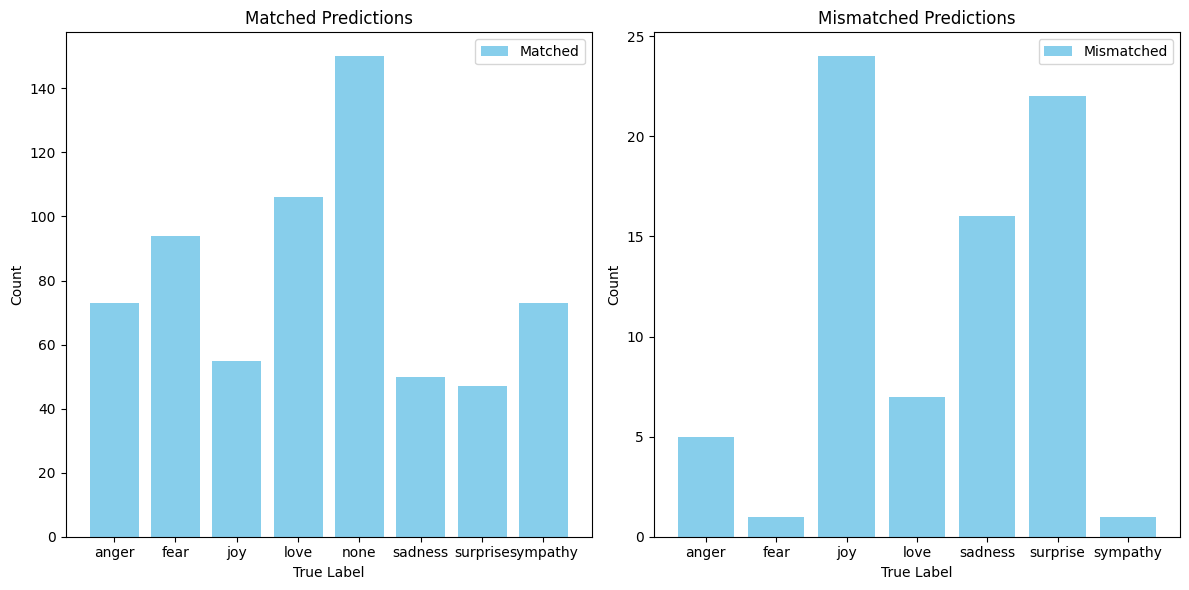

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_embeddings.csv",
    "/content/transformer_examples.csv",
    "/content/gru (1).csv"
]

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Load the CSV files into DataFrames
data_frames = [pd.read_csv(path) for path in csv_paths]

# Create a DataFrame to store the merged predictions
merged_df = pd.DataFrame()

# Add the true labels
merged_df["True Label"] = data_frames[0]["True Label"]  # Assuming all true labels are the same

# Add predicted labels from each model
for i, model_name in enumerate(model_names):
    merged_df[model_name] = data_frames[i]["Predicted Label"]

# Add a column to indicate if predictions match each other
for i in range(1, len(model_names)):
    col_name = f"Match {model_names[i]}"
    merged_df[col_name] = (merged_df[model_names[i]] == merged_df[model_names[0]]).astype(int)

# Add a column to indicate if all predictions match for each sample
merged_df["All Match"] = merged_df.iloc[:, 3:].all(axis=1).astype(int)

# Compare matched predictions with true label and count matches and mismatches
matched_samples = merged_df[merged_df["All Match"] == 1]
match_counts = matched_samples.groupby(["True Label"]).size()
mismatch_counts = matched_samples[matched_samples["True Label"] != matched_samples[model_names[0]]].groupby(["True Label"]).size()

# Create subplots for matched and mismatched counts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot matched counts
ax1.bar(match_counts.index, match_counts.values, label="Matched", color="skyblue")
ax1.set_xlabel("True Label")
ax1.set_ylabel("Count")
ax1.set_title("Matched Predictions")
ax1.legend()

# Plot mismatched counts
ax2.bar(mismatch_counts.index, mismatch_counts.values, label="Mismatched", color="skyblue")
ax2.set_xlabel("True Label")
ax2.set_ylabel("Count")
ax2.set_title("Mismatched Predictions")
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()


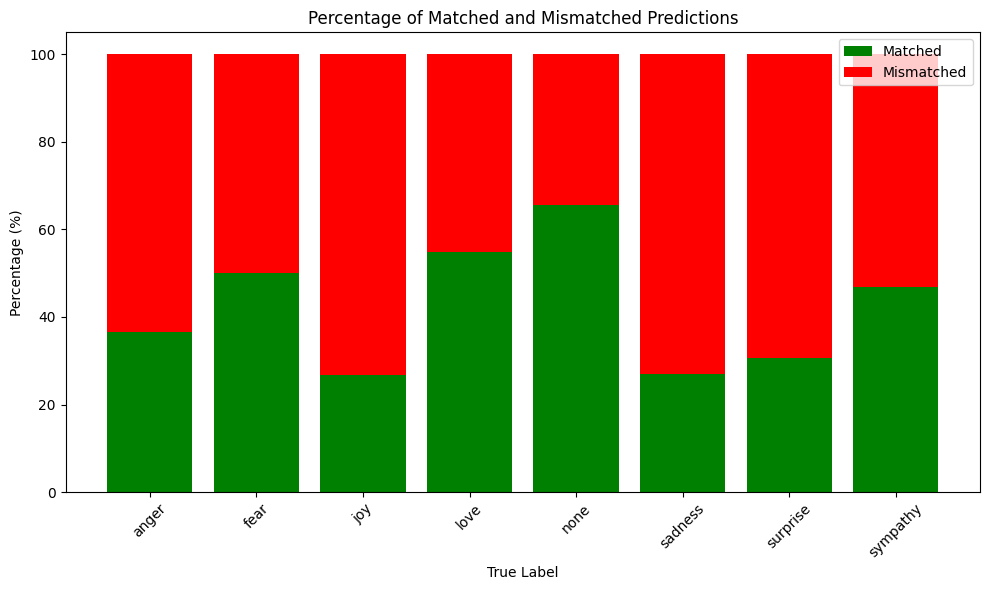

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_embeddings.csv",
    "/content/transformer_examples.csv",
    "/content/gru (1).csv"
]

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Load the CSV files into DataFrames
data_frames = [pd.read_csv(path) for path in csv_paths]

# Create a DataFrame to store the merged predictions
merged_df = pd.DataFrame()

# Add the true labels
merged_df["True Label"] = data_frames[0]["True Label"]  # Assuming all true labels are the same

# Add predicted labels from each model
for i, model_name in enumerate(model_names):
    merged_df[model_name] = data_frames[i]["Predicted Label"]

# Add a column to indicate if predictions match each other
for i in range(1, len(model_names)):
    col_name = f"Match {model_names[i]}"
    merged_df[col_name] = (merged_df[model_names[i]] == merged_df[model_names[0]]).astype(int)

# Add a column to indicate if all predictions match for each sample
merged_df["All Match"] = merged_df.iloc[:, 3:].all(axis=1).astype(int)

# Count the number of matched and mismatched samples for each true label
label_counts = merged_df.groupby(["True Label"])["All Match"].value_counts().unstack(fill_value=0)
label_total = label_counts.sum(axis=1)
label_percent_matched = (label_counts[1] / label_total) * 100
label_percent_mismatched = (label_counts[0] / label_total) * 100

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(label_percent_matched.index, label_percent_matched.values, label="Matched", color="green")
plt.bar(label_percent_mismatched.index, label_percent_mismatched.values, bottom=label_percent_matched.values, label="Mismatched", color="red")
plt.xlabel("True Label")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Matched and Mismatched Predictions")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


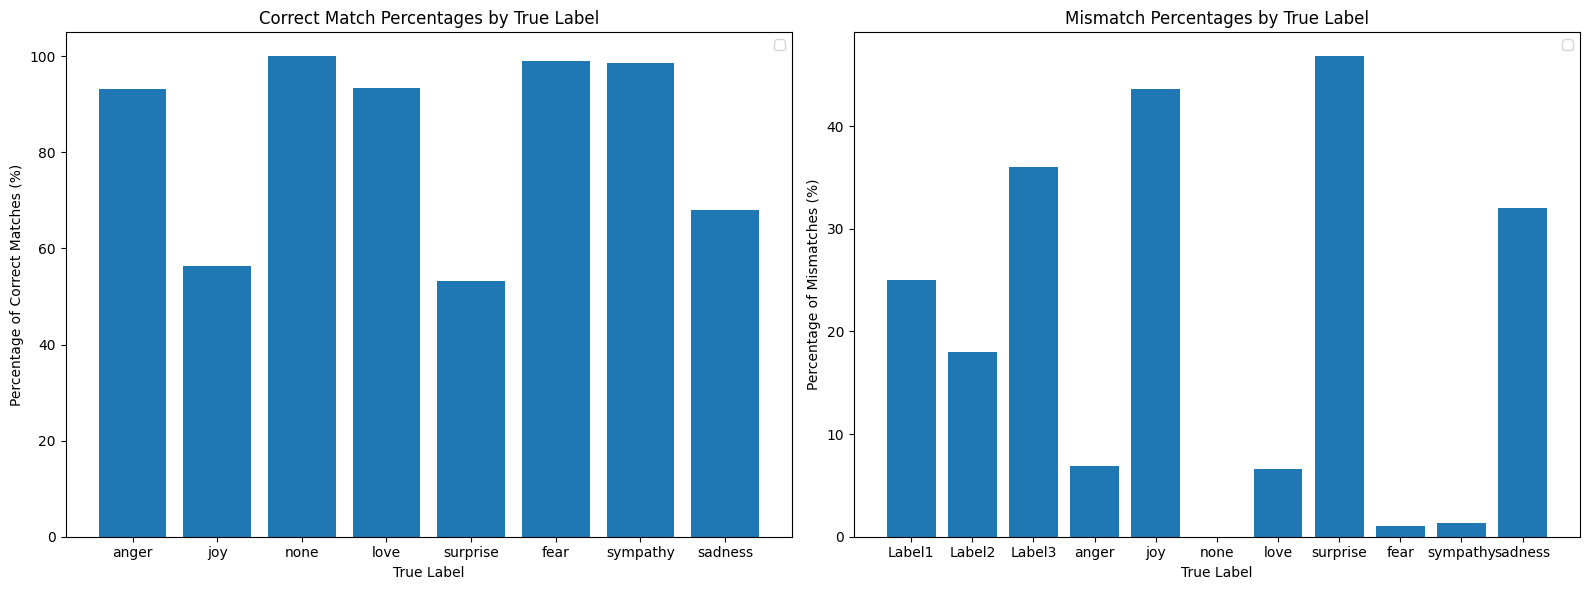

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_embeddings.csv",
    "/content/transformer_examples.csv",
    "/content/gru (1).csv"
]

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Load the CSV files into DataFrames
data_frames = [pd.read_csv(path) for path in csv_paths]

# Create a DataFrame to store the merged predictions
merged_df = pd.DataFrame()

# Add the true labels
merged_df["True Label"] = data_frames[0]["True Label"]  # Assuming all true labels are the same

# Add predicted labels from each model
for i, model_name in enumerate(model_names):
    merged_df[model_name] = data_frames[i]["Predicted Label"]

# Add a column to indicate if predictions match each other
for i in range(1, len(model_names)):
    col_name = f"Match {model_names[i]}"
    merged_df[col_name] = (merged_df[model_names[i]] == merged_df[model_names[0]]).astype(int)

# Add a column to indicate if all predictions match for each sample
merged_df["All Match"] = merged_df.iloc[:, 3:].all(axis=1).astype(int)

# Compare matched predictions with true label and count matches and mismatches
matched_samples = merged_df[merged_df["All Match"] == 1]

# Calculate percentages of matched predictions per true label
true_labels = matched_samples["True Label"].unique()
match_percentages = {}

for label in true_labels:
    label_matched_samples = matched_samples[matched_samples["True Label"] == label]
    total_matched_for_label = len(label_matched_samples)
    correct_matches = len(label_matched_samples[label_matched_samples[model_names[0]] == label])
    match_percentages[label] = (correct_matches / total_matched_for_label) * 100



for label in true_labels:
    label_matched_samples = matched_samples[matched_samples["True Label"] == label]
    label_mismatched_samples = matched_samples[(matched_samples["True Label"] == label) & (matched_samples[model_names[0]] != label)]

    total_matched_for_label = len(label_matched_samples)
    total_mismatched_for_label = len(label_mismatched_samples)

    correct_matches = len(label_matched_samples[label_matched_samples[model_names[0]] == label])
    mismatch_percentages[label] = (total_mismatched_for_label / total_matched_for_label) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create a bar plot for matched percentages
ax1.bar(match_percentages.keys(), match_percentages.values())
ax1.set_xlabel("True Label")
ax1.set_ylabel("Percentage of Correct Matches (%)")
ax1.set_title("Correct Match Percentages by True Label")
ax1.set_ylim(0, 100)  # Set y-axis limits
#ax1.tick_params(axis='x', rotation=45, ha="right")
ax1.legend()

# Create a bar plot for mismatched percentages
ax2.bar(mismatch_percentages.keys(), mismatch_percentages.values())
ax2.set_xlabel("True Label")
ax2.set_ylabel("Percentage of Mismatches (%)")
ax2.set_title("Mismatch Percentages by True Label")
ax2.set_ylim(0, 100)  # Set y-axis limits
#ax2.tick_params(axis='x', rotation=45, ha="right")
ax2.legend()

plt.tight_layout()
plt.show()

In [84]:
import pandas as pd

csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_embeddings.csv",
    "/content/transformer_examples.csv",
    "/content/gru (1).csv"
]

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Load the CSV files into DataFrames
data_frames = [pd.read_csv(path) for path in csv_paths]

# Create a DataFrame to store the merged predictions
merged_df = pd.DataFrame()

# Add the true labels
merged_df["True Label"] = data_frames[0]["True Label"]  # Assuming all true labels are the same

# Add predicted labels from each model
for i, model_name in enumerate(model_names):
    merged_df[model_name] = data_frames[i]["Predicted Label"]

# Add a column to indicate if predictions match each other
for i in range(1, len(model_names)):
    col_name = f"Match {model_names[i]}"
    merged_df[col_name] = (merged_df[model_names[i]] == merged_df[model_names[0]]).astype(int)

# Add a column to indicate if all predictions match for each sample
merged_df["All Match"] = merged_df.iloc[:, 3:].all(axis=1).astype(int)

# Initialize dictionaries to store counts
total_matched_samples_correct_per_label = {}
total_matched_samples_wrong_per_label = {}
total_mismatched_per_label = {}


# Count samples that don't match at all per original label
for true_label in merged_df["True Label"].unique():
    mismatched_samples = merged_df[(merged_df["All Match"] == 0) & (merged_df["True Label"] == true_label)]
    total_mismatched_per_label[true_label] = len(mismatched_samples)

for true_label in merged_df["True Label"].unique():
    matched_samples_correct = merged_df[(merged_df["All Match"] == 1) & (merged_df["True Label"] == true_label)& (merged_df["Logistic Regression"] == true_label)]
    total_matched_samples_correct_per_label[true_label] = len(matched_samples_correct)

for true_label in merged_df["True Label"].unique():
    matched_samples_wrong = merged_df[(merged_df["All Match"] == 1) & (merged_df["True Label"] == true_label)& (merged_df["Logistic Regression"] != true_label)]
    total_matched_samples_wrong_per_label[true_label] = len(matched_samples_wrong)
for true_label in total_mismatched_per_label:
    mismatch_count = total_mismatched_per_label[true_label]
    match_correct_count = total_matched_samples_correct_per_label.get(true_label, 0)
    match_wrong_count = total_matched_samples_wrong_per_label.get(true_label, 0)

    print(f"True Label {true_label}:")
    print(f"  Total Mismatches: {mismatch_count}")
    print(f"  Total Correct Matches: {match_correct_count}")
    print(f"  Total Wrong Matches: {match_wrong_count}")



True Label fear:
  Total Mismatches: 94
  Total Correct Matches: 93
  Total Wrong Matches: 1
True Label anger:
  Total Mismatches: 127
  Total Correct Matches: 68
  Total Wrong Matches: 5
True Label joy:
  Total Mismatches: 150
  Total Correct Matches: 31
  Total Wrong Matches: 24
True Label none:
  Total Mismatches: 79
  Total Correct Matches: 150
  Total Wrong Matches: 0
True Label love:
  Total Mismatches: 87
  Total Correct Matches: 99
  Total Wrong Matches: 7
True Label sadness:
  Total Mismatches: 135
  Total Correct Matches: 34
  Total Wrong Matches: 16
True Label surprise:
  Total Mismatches: 107
  Total Correct Matches: 25
  Total Wrong Matches: 22
True Label sympathy:
  Total Mismatches: 83
  Total Correct Matches: 72
  Total Wrong Matches: 1


In [82]:
merged_df

,True Label,Logistic Regression,Naive Bayes,Transformer,GRU,Match Naive Bayes,Match Transformer,Match GRU,All Match
0,fear,none,none,surprise,none,1,0,1,0
1,anger,anger,anger,anger,anger,1,1,1,1
2,joy,none,none,none,none,1,1,1,1
3,none,none,none,none,none,1,1,1,1
4,fear,fear,sadness,fear,fear,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1505,anger,anger,anger,anger,anger,1,1,1,1
1506,fear,fear,fear,fear,fear,1,1,1,1
1507,joy,anger,joy,surprise,joy,0,0,0,0
1508,surprise,anger,anger,anger,surprise,1,1,0,0
